In [17]:
#Import packages
import geopandas as gpd
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
import math
from shapely.affinity import translate
from shapely.geometry import Polygon

In [2]:
#Load shapefile
TestPoints = gpd.read_file('Shapefiles/OhaweBeach_intersects.shp')

TestPoints.crs = 2193
#View shapefile table
TestPoints

OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
0            1           1           1           1  08/05/1951  15.261085   
1            2           1           1           1  28/08/1972  16.499539   
2            3           1           1           1  19/03/2017  11.448243   
3            4           2           2           1  08/05/1951  16.006630   
4            5           2           2           1  28/08/1972  17.954045   
...        ...         ...         ...         ...         ...        ...   
5295      5398         897         897           1  30/12/2009  17.875030   
5296      5399         897         897           1  19/03/2017  16.096489   
5297      5400         898         898           1  02/09/2003  15.292746   
5298      5401         898         898           1  30/12/2009  18.682005   
5299      5402         898         898           1  19/03/2017  14.861966   

        IntersectX    IntersectY  Uncertaint  Code  \
0     1.695399e+06  5.618558e+06    3.203576     2   
1     1.695399e+06  5.618556e+06    3.472650     2   
2     1.695400e+06  5.618561e+06    2.396623     2   
3     1.695409e+06  5.618558e+06    3.203576     2   
4     1.695409e+06  5.618556e+06    3.472650     2   
...            ...           ...         ...   ...   
5295  1.703997e+06  5.616813e+06    2.429774     2   
5296  1.703998e+06  5.616815e+06    2.396623     2   
5297  1.704008e+06  5.616812e+06    2.452305     2   
5298  1.704007e+06  5.616809e+06    2.429774     2   
5299  1.704008e+06  5.616812e+06    2.396623     2   

                             geometry  
0     POINT (1695399.271 5618557.671)  
1     POINT (1695399.166 5618556.437)  
2     POINT (1695399.595 5618561.470)  
3     POINT (1695409.018 5618557.575)  
4     POINT (1695408.832 5618555.637)  
...                               ...  
5295  POINT (1703997.363 5616812.899)  
5296  POINT (1703998.095 5616814.520)  
5297  POINT (1704008.263 5616811.868)  
5298  POINT (1704006.950 5616808.743)  
5299  POINT (1704008.430 5616812.265)  

[5300 rows x 11 columns]

In [3]:
#Adding a new column with 1950 as the base date for all
TestPoints['BaseDate']= '1/1/1940'
TestPoints['BaseDate']=pd.to_datetime(TestPoints['BaseDate'])

#Adding new column and converts to datetime
TestPoints['Date']=pd.to_datetime(TestPoints['ShorelineI'], format = 'mixed')

# Finding the number of days between base date 1950 and the respective row date
TestPoints['ElapsedTime']=TestPoints.Date - TestPoints.BaseDate

#Adding another row with Date in 2100
TestPoints['to2100']='1/1/2100'

#Convert to datetime
TestPoints['to2100']=pd.to_datetime(TestPoints['to2100'])

#Finding number of days to 2100
TestPoints['Future'] = TestPoints.to2100 - TestPoints.Date

In [4]:
#View top of shaefile table
TestPoints.tail(20)

OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
5280      5383         894         894           1  02/09/2003  13.277111   
5281      5384         894         894           1  30/12/2009  11.362420   
5282      5385         894         894           1  19/03/2017  13.787433   
5283      5386         894         894           1  07/03/2022  17.037384   
5284      5387         895         895           1  08/05/1951  33.745201   
5285      5388         895         895           1  02/09/2003  12.423810   
5286      5389         895         895           1  30/12/2009  11.601245   
5287      5390         895         895           1  19/03/2017  16.071511   
5288      5391         895         895           1  07/03/2022  17.641054   
5289      5392         896         896           1  08/05/1951  31.869571   
5290      5393         896         896           1  02/09/2003  14.843657   
5291      5394         896         896           1  30/12/2009  14.872151   
5292      5395         896         896           1  19/03/2017  17.260285   
5293      5396         897         897           1  08/05/1951  31.526249   
5294      5397         897         897           1  02/09/2003  14.874264   
5295      5398         897         897           1  30/12/2009  17.875030   
5296      5399         897         897           1  19/03/2017  16.096489   
5297      5400         898         898           1  02/09/2003  15.292746   
5298      5401         898         898           1  30/12/2009  18.682005   
5299      5402         898         898           1  19/03/2017  14.861966   

        IntersectX    IntersectY  Uncertaint  Code  \
5280  1.703972e+06  5.616830e+06    2.452305     3   
5281  1.703972e+06  5.616831e+06    2.429774     3   
5282  1.703971e+06  5.616829e+06    2.396623     3   
5283  1.703970e+06  5.616826e+06    2.409544     3   
5284  1.703971e+06  5.616806e+06    3.203576     3   
5285  1.703980e+06  5.616825e+06    2.452305     3   
5286  1.703981e+06  5.616826e+06    2.429774     3   
5287  1.703979e+06  5.616822e+06    2.396623     3   
5288  1.703978e+06  5.616820e+06    2.409544     3   
5289  1.703981e+06  5.616803e+06    3.203576     2   
5290  1.703989e+06  5.616819e+06    2.452305     2   
5291  1.703989e+06  5.616819e+06    2.429774     2   
5292  1.703987e+06  5.616817e+06    2.396623     2   
5293  1.703992e+06  5.616800e+06    3.203576     2   
5294  1.703999e+06  5.616816e+06    2.452305     2   
5295  1.703997e+06  5.616813e+06    2.429774     2   
5296  1.703998e+06  5.616815e+06    2.396623     2   
5297  1.704008e+06  5.616812e+06    2.452305     2   
5298  1.704007e+06  5.616809e+06    2.429774     2   
5299  1.704008e+06  5.616812e+06    2.396623     2   

                             geometry   BaseDate       Date ElapsedTime  \
5280  POINT (1703971.533 5616829.770) 1940-01-01 2003-02-09  23050 days   
5281  POINT (1703972.432 5616831.461) 1940-01-01 2009-12-30  25566 days   
5282  POINT (1703971.294 5616829.320) 1940-01-01 2017-03-19  28202 days   
5283  POINT (1703969.768 5616826.450) 1940-01-01 2022-07-03  30134 days   
5284  POINT (1703970.567 5616805.857) 1940-01-01 1951-08-05   4234 days   
5285  POINT (1703980.334 5616824.810) 1940-01-01 2003-02-09  23050 days   
5286  POINT (1703980.711 5616825.541) 1940-01-01 2009-12-30  25566 days   
5287  POINT (1703978.663 5616821.567) 1940-01-01 2017-03-19  28202 days   
5288  POINT (1703977.944 5616820.172) 1940-01-01 2022-07-03  30134 days   
5289  POINT (1703980.960 5616803.478) 1940-01-01 1951-08-05   4234 days   
5290  POINT (1703988.531 5616818.727) 1940-01-01 2003-02-09  23050 days   
5291  POINT (1703988.518 5616818.702) 1940-01-01 2009-12-30  25566 days   
5292  POINT (1703987.456 5616816.563) 1940-01-01 2017-03-19  28202 days   
5293  POINT (1703991.745 5616800.457) 1940-01-01 1951-08-05   4234 days   
5294  POINT (1703998.598 5616815.633) 1940-01-01 2003-02-09  23050 days   
5295  POINT (1703997.363 5616812.899) 1940-01-01 2009

In [5]:
# New DataFrame with only latest X/Y coordinates for TestPoints
TestPoints_latest = TestPoints.sort_values('Date', ascending = False)
TestPoints_latest = TestPoints_latest.drop_duplicates('TransectID')

TestPoints_latest

OBJECTID  TransectID  TransOrder  BaselineID  ShorelineI   Distance  \
4814      4917         818         818           1  07/03/2022  11.754995   
4142      4202         707         707           1  07/03/2022  16.160644   
1030      1068         234         234           1  07/03/2022  12.916363   
2921      2973         525         525           1  07/03/2022  13.042800   
1024      1062         233         233           1  07/03/2022  14.326393   
...        ...         ...         ...         ...         ...        ...   
4201      4293         726         726           1  04/02/1982   6.163223   
572        610         157         157           1  28/08/1972  41.395618   
570        608         156         156           1  28/08/1972  38.336459   
3038      3090         544         544           1  28/08/1972  41.784485   
3036      3088         543         543           1  28/08/1972  38.548413   

        IntersectX    IntersectY  Uncertaint  Code  \
4814  1.703355e+06  5.617262e+06    2.409544     4   
4142  1.702238e+06  5.617485e+06    2.409544     4   
1030  1.697670e+06  5.618288e+06    2.409544     4   
2921  1.700472e+06  5.617652e+06    2.409544     4   
1024  1.697660e+06  5.618291e+06    2.409544     3   
...            ...           ...         ...   ...   
4201  1.702484e+06  5.617475e+06    4.004298     2   
572   1.696896e+06  5.618404e+06    3.472650     2   
570   1.696886e+06  5.618407e+06    3.472650     2   
3038  1.700667e+06  5.617623e+06    3.472650     2   
3036  1.700657e+06  5.617621e+06    3.472650     2   

                             geometry   BaseDate       Date ElapsedTime  \
4814  POINT (1703355.288 5617262.068) 1940-01-01 2022-07-03  30134 days   
4142  POINT (1702237.744 5617484.529) 1940-01-01 2022-07-03  30134 days   
1030  POINT (1697669.929 5618287.745) 1940-01-01 2022-07-03  30134 days   
2921  POINT (1700472.014 5617651.922) 1940-01-01 2022-07-03  30134 days   
1024  POINT (1697660.282 5618290.680) 1940-01-01 2022-07-03  30134 days   
...                               ...        ...        ...         ...   
4201  POINT (1702483.897 5617474.593) 1940-01-01 1982-04-02  15432 days   
572   POINT (1696896.241 5618403.505) 1940-01-01 1972-08-28  11928 days   
570   POINT (1696885.515 5618407.072) 1940-01-01 1972-08-28  11928 days   
3038  POINT (1700666.844 5617622.708) 1940-01-01 1972-08-28  11928 days   
3036  POINT (1700657.112 5617621.089) 1940-01-01 1972-08-28  11928 days   

         to2100     Future  
4814 2100-01-01 28306 days  
4142 2100-01-01 28306 days  
1030 2100-01-01 28306 days  
2921 2100-01-01 28306 days  
1024 2100-01-01 28306 days  
...         ...        ...  
4201 2100-01-01 43008 days  
572  2100-01-01 46512 days  
570  2100-01-01 46512 days  
3038 2100-01-01 46512 days  
3036 2100-01-01 46512 days  

[856 rows x 16 columns]

In [6]:
# To view what format each variable is in and converting ElapsedTime to seconds
TestPoints['ElapsedTimeSeconds'] = TestPoints['ElapsedTime'].dt.total_seconds().astype(float)

print(TestPoints.dtypes)

OBJECTID                        int64
TransectID                      int64
TransOrder                      int64
BaselineID                      int64
ShorelineI                     object
Distance                      float64
IntersectX                    float64
IntersectY                    float64
Uncertaint                    float64
Code                            int64
geometry                     geometry
BaseDate               datetime64[ns]
Date                   datetime64[ns]
ElapsedTime           timedelta64[ns]
to2100                 datetime64[ns]
Future                timedelta64[ns]
ElapsedTimeSeconds            float64
dtype: object


In [10]:
(dates - reference_date).iloc[0].days / 365.25

1.5906913073237507

     TransectID     Slope  Intercept  PredictedDistance
0             1 -0.066693  16.436147           6.432335
1             2 -0.083276  17.636042           5.144816
2             3 -0.142686  22.460182           1.057534
3             4 -0.110509  20.281034           3.704849
4             5 -0.158205  23.344749          -0.385709
..          ...       ...        ...                ...
851         894 -0.311374  33.992349         -12.713258
852         895 -0.272496  32.161362          -8.712642
853         896 -0.260273  31.547515          -7.493084
854         897 -0.247675  31.356219          -5.794748
855         898 -0.034502  18.352615          13.177362

[856 rows x 4 columns]
Transect 1 - Distance difference: 4.187442666793789
Transect 2 - Distance difference: 5.228636129574614
Transect 3 - Distance difference: 8.958821069691352
Transect 4 - Distance difference: 6.938537446139115
Transect 5 - Distance difference: 9.933206902334918
Transect 6 - Distance difference: 8.50766514

C:\Users\lalit\AppData\Local\Temp\ipykernel_27544\3594652682.py:77: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


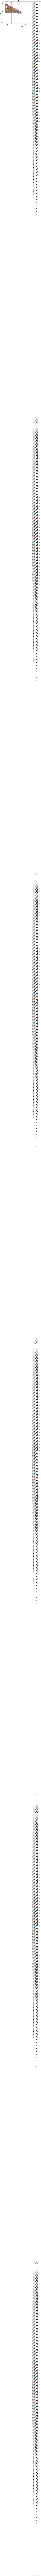

In [7]:
# Example data (replace this with your actual data)
dates = pd.to_datetime(TestPoints['Date'])  # Replace with your date values
distances = np.array(TestPoints['Distance'])  # Replace with your distance values

# Convert datetime to numerical values (days since a reference date)
reference_date = pd.to_datetime('1950-01-01')
numerical_dates = (dates - reference_date).dt.days /365.25

# Group data by Transect ID
grouped = TestPoints.groupby('TransectID')

# Perform linear regression for each group
results = []
for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days /365.25
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]

    # Calculate the predicted distance for the target date (2100-01-01)
    numerical_target_date = (pd.to_datetime('2100-01-01') - reference_date).days /365.25
    predicted_distance_target = slope * numerical_target_date + intercept

    results.append({
        'TransectID': group_name,
        'Slope': slope,
        'Intercept': intercept,
        'PredictedDistance': predicted_distance_target
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

# Calculate the absolute difference between the predicted distances and the old distances for each Transect ID
plt.figure(figsize=(10, 6))

distance_lookup = {}

for group_name, group_data in grouped:
    # Convert datetime to numerical values (days since a reference date)
    group_data['NumericalDate'] = (group_data['Date'] - reference_date).dt.days
    
    coefficients = np.polyfit(group_data['NumericalDate'], group_data['Distance'], 1)
    slope = coefficients[0]
    intercept = coefficients[1]
    
    # Calculate the predicted distance for the last old data point's date
    last_old_date = group_data['Date'].max()
    numerical_last_old_date = (last_old_date - reference_date).days
    predicted_distance_last_old = slope * numerical_last_old_date + intercept

    # Calculate the predicted distance for the target date
    numerical_target_date = (pd.to_datetime('2080') - reference_date).days #Why target date of 2100 in graph when this set to 2080
    predicted_distance_target = slope * numerical_target_date + intercept

    # Calculate the absolute difference between the predicted distances
    distance_difference = abs(predicted_distance_last_old - predicted_distance_target)
    distance_lookup[group_name] = distance_difference

    plt.scatter(group_data['Date'], group_data['Distance'], label=f'Transect {group_name}')
    plt.plot(group_data['Date'], slope * group_data['NumericalDate'] + intercept, label=f'Linear Fit {group_name}')
    plt.scatter(numerical_target_date, predicted_distance_target, label=f'Predicted Point {group_name}')

    print(f"Transect {group_name} - Distance difference: {distance_difference}")

plt.xlabel('Date')
plt.ylabel('Distance')
plt.title('Date vs. Distance')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
distance_lookup

{1: 4.187442666793789,
 2: 5.228636129574614,
 3: 8.958821069691352,
 4: 6.938537446139115,
 5: 9.933206902334918,
 6: 8.507665146100459,
 7: 9.506733158294393,
 8: 11.61606168610367,
 9: 10.997218369784708,
 10: 7.702324800522504,
 11: 6.322971833046314,
 12: 5.778920527553549,
 13: 21.675205180622743,
 14: 10.625686082010809,
 15: 9.771115039944881,
 16: 8.916510063993865,
 17: 11.259163754850437,
 18: 0.3062045390520751,
 19: 2.0062184139686323,
 20: 4.318905448598127,
 21: 5.328172891605929,
 22: 4.914544601283406,
 23: 4.7376687790301855,
 24: 5.9470133039411515,
 25: 8.135887680651273,
 26: 8.802962368533041,
 27: 10.001647927278029,
 28: 11.84405950461663,
 29: 11.12499244385701,
 30: 11.57278749841111,
 31: 7.116705543038716,
 32: 6.104382880285836,
 33: 19.290617222843604,
 34: 11.926975186587853,
 35: 7.9197535625316995,
 36: 10.504419533529795,
 37: 4.494862102542941,
 38: 6.4525219997655086,
 39: 8.517709474258218,
 40: 8.004636847506585,
 41: 3.6154044404649976,
 42: 4.685

In [9]:
print(group_data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3 entries, 5297 to 5299
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   OBJECTID            3 non-null      int64          
 1   TransectID          3 non-null      int64          
 2   TransOrder          3 non-null      int64          
 3   BaselineID          3 non-null      int64          
 4   ShorelineI          3 non-null      object         
 5   Distance            3 non-null      float64        
 6   IntersectX          3 non-null      float64        
 7   IntersectY          3 non-null      float64        
 8   Uncertaint          3 non-null      float64        
 9   Code                3 non-null      int64          
 10  geometry            3 non-null      geometry       
 11  BaseDate            3 non-null      datetime64[ns] 
 12  Date                3 non-null      datetime64[ns] 
 13  ElapsedTime         3 non-null

In [22]:
# Replace 'path_to_shapefile' with the actual path to your shapefile
shapefile_path = ('Shapefiles/OhaweBeach_TransectLines.shp')
TransectLine = gpd.read_file(shapefile_path)

#Line shapefiles have azimuth 
TransectLine

OBJECTID  TransectID  BaselineID  GroupID  TransOrder  Azimuth  ShrCount  \
0           1           1           1        0           1     4.87         3   
1           2           2           1        0           2     5.49         3   
2           3           3           1        0           3     6.29         3   
3           4           4           1        0           4     8.22         3   
4           5           5           1        0           5     9.01         3   
..        ...         ...         ...      ...         ...      ...       ...   
850       881         894           1        0         894    28.00         5   
851       882         895           1        0         895    27.26         5   
852       883         896           1        0         896    26.40         4   
853       884         897           1        0         897    24.30         4   
854       885         898           1        0         898    22.79         3   

        TCD  SHAPE_Leng    SCE  ...  EPRunc   LRR   LR2   LSE  LCI90   WLR  \
0       0.0   16.499539   5.05  ...    0.06 -0.07  0.72  1.98   0.26 -0.07   
1      10.0   17.954064   6.62  ...    0.06 -0.08  0.67  2.77   0.37 -0.09   
2      20.0   21.421422   9.26  ...    0.06 -0.14  0.86  2.76   0.37 -0.15   
3      30.0   19.239392   6.80  ...    0.06 -0.11  0.91  1.61   0.21 -0.11   
4      40.0   21.905003   9.76  ...    0.06 -0.16  0.92  2.21   0.29 -0.16   
..      ...         ...    ...  ...     ...   ...   ...   ...    ...   ...   
850  9240.0   35.282779  23.92  ...    0.06 -0.31  0.83  4.67   0.19 -0.29   
851  9250.0   33.745203  22.14  ...    0.06 -0.27  0.76  5.14   0.21 -0.25   
852  9260.0   31.869571  17.03  ...    0.06 -0.26  0.90  3.11   0.17 -0.25   
853  9270.0   31.526253  16.65  ...    0.06 -0.25  0.92  2.67   0.15 -0.24   
854  9280.0   18.681982   3.82  ...    0.25 -0.04  0.02  2.93   1.93 -0.05   

      WR2   WSE  WCI90                                           geometry  
0    0.80  0.59   0.22  LINESTRING (1695399.166 5618556.437, 1695400.5...  
1    0.76  0.83   0.30  LINESTRING (1695408.832 5618555.637, 1695410.5...  
2    0.90  0.83   0.30  LINESTRING (1695418.179 5618552.848, 1695420.5...  
3    0.94  0.48   0.18  LINESTRING (1695427.773 5618555.419, 1695430.5...  
4    0.95  0.66   0.24  LINESTRING (1695437.088 5618553.114, 1695440.5...  
..    ...   ...    ...                                                ...  
850  0.74  1.90   0.23  LINESTRING (1703961.202 5616810.341, 1703977.7...  
851  0.64  2.08   0.26  LINESTRING (1703970.567 5616805.857, 1703986.0...  
852  0.85  1.27   0.21  LINESTRING (1703980.960 5616803.477, 1703995.1...  
853  0.88  1.09   0.18  LINESTRING (1703991.745 5616800.457, 1704004.7...  
854  0.02  1.21   1.93  LINESTRING (1704006.950 5616808.743, 1704014.1...  

[855 rows x 22 columns]

In [23]:
distance_difference

2.1662818186264516

In [58]:
def calculate_new_coordinates(old_x, old_y, bearing, distance):
    bearing_radians = math.radians(bearing)
    new_x = old_x + (distance * math.sin(bearing_radians))
    new_y = old_y + (distance * math.cos(bearing_radians))
    return new_x, new_y

# Calculate New X/Y coordinates for each Transect
new_TransectLine = TransectLine[['TransectID', 'Azimuth']]
new_TransectLine = new_TransectLine.merge(TestPoints_latest[['TransectID', 'IntersectX', 'IntersectY']], on = 'TransectID')

new_TransectLine[['NewX', 'NewY']] = new_TransectLine.apply(lambda row: calculate_new_coordinates(row['IntersectX'],
                                                                                                 row['IntersectY'],
                                                                                                 row['Azimuth'],
                                                                                                 distance_lookup[row.TransectID]),
                                                           axis = 1,
                                                           result_type = 'expand')

new_TransectLine = new_TransectLine.sort_values('TransectID', ascending = True)
new_TransectLine

TransectID  Azimuth    IntersectX    IntersectY          NewX  \
0             1     4.87  1.695400e+06  5.618561e+06  1.695400e+06   
1             2     5.49  1.695409e+06  5.618562e+06  1.695410e+06   
2             3     6.29  1.695419e+06  5.618562e+06  1.695420e+06   
3             4     8.22  1.695429e+06  5.618562e+06  1.695430e+06   
4             5     9.01  1.695439e+06  5.618563e+06  1.695440e+06   
..          ...      ...           ...           ...           ...   
850         894    28.00  1.703970e+06  5.616826e+06  1.703978e+06   
851         895    27.26  1.703978e+06  5.616820e+06  1.703985e+06   
852         896    26.40  1.703987e+06  5.616817e+06  1.703995e+06   
853         897    24.30  1.703998e+06  5.616815e+06  1.704004e+06   
854         898    22.79  1.704008e+06  5.616812e+06  1.704009e+06   

             NewY  
0    5.618566e+06  
1    5.618567e+06  
2    5.618571e+06  
3    5.618569e+06  
4    5.618573e+06  
..            ...  
850  5.616842e+06  
851  5.616834e+06  
852  5.616831e+06  
853  5.616829e+06  
854  5.616814e+06  

[855 rows x 6 columns]

<Axes: >

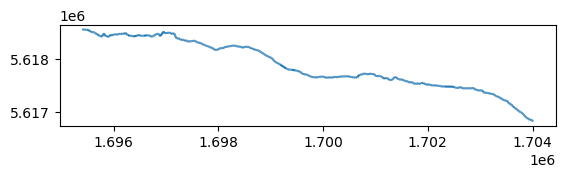

In [49]:
# Convert Dataframe to geodataframe
new_TransectLine = gpd.GeoDataFrame(new_TransectLine, geometry = gpd.points_from_xy(new_TransectLine.NewX, 
                                                                       new_TransectLine.NewY),
                                    crs = 'EPSG:2193').rename(columns = {'geometry': 'from_point'})
# Get from and to points
new_TransectLine['to_point'] = new_TransectLine.from_point.shift(-1)
new_TransectLine.loc[new_TransectLine["to_point"].isna(), "to_point"] = new_TransectLine["from_point"]

# Get Line geometry between points
new_TransectLine['geometry'] = new_TransectLine.apply(lambda row: LineString([row['from_point'], row['to_point']]),
                                                 axis = 1)
new_TransectLine.plot()


<Axes: >

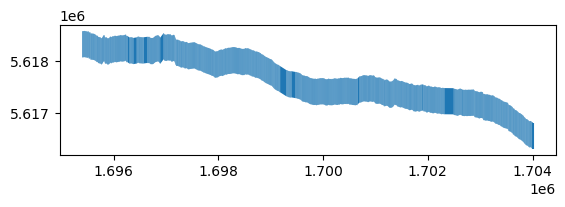

In [15]:
#Need to add code to convert line to polygon extending 500m to the left side 
def extend(line):
  return line.union(translate(line, yoff=-500)).convex_hull #change yoff to suit shoreline orientation

Shoreline_polygon = new_TransectLine.geometry.apply(extend)

# Create a new GeoDataFrame from the polygons
Shoreline_polygon_gdf = gpd.GeoDataFrame(geometry=Shoreline_polygon, crs='EPSG:2193')

# Copy the attribute columns from the original line GeoDataFrame
Shoreline_polygon_gdf = Shoreline_polygon_gdf.join(new_TransectLine.drop('geometry', axis=1))

Shoreline_polygon_gdf.plot()


In [16]:
# Assuming Shoreline_polygon_gdf has multiple geometry columns, select the one you want to save
# Replace 'selected_geometry_column_name' with the actual column name
selected_geometry_column = 'geometry'

# Create a new GeoDataFrame with just the selected geometry column
gdf = gpd.GeoDataFrame(geometry=Shoreline_polygon_gdf[selected_geometry_column])

# Convert LINESTRING to POLYGON using the .buffer(0) method
gdf['geometry'] = gdf['geometry'].buffer(0)

# Define the path where you want to save the shapefile
output_shapefile = "Projected_Shoreline_Polygons/OhaweBeach_linear.shp"  # Replace with your desired file path and name

# Define the EPSG code for the desired spatial reference (e.g., 2193 for New Zealand Transverse Mercator)
spatial_reference = "EPSG:2193"

# Set the GeoDataFrame's CRS (Coordinate Reference System) to the desired spatial reference
gdf.crs = spatial_reference

# Save the GeoDataFrame as a shapefile with the specified CRS
gdf.to_file(output_shapefile, driver="ESRI Shapefile")

# Verify that the shapefile has been created successfully
print(f"Shapefile saved to {output_shapefile} with CRS: {spatial_reference}")

Shapefile saved to Projected_Shoreline_Polygons/OhaweBeach_linear.shp with CRS: EPSG:2193
